## Stochastic Gradient Descent

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import rc, animation
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Utilizamos el dataset de iris lo importamos y lo transformamos en pandas dataframe para manipular los datos

In [2]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A continuación realizamos una descripción general de los datos, así como su matriz de correlación con las 4 variables

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


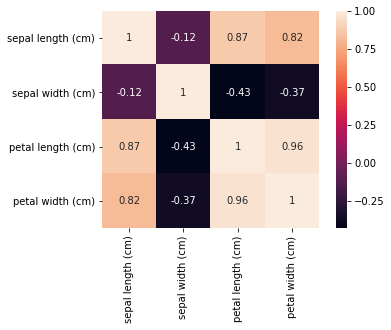

In [4]:
## Matriz de correlacion de las 4 variables
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True)
plt.show()

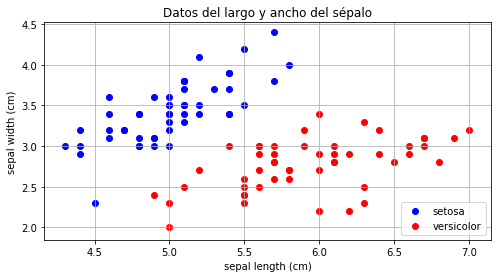

In [5]:
X = data.data
Y = data.target

f1 = 0
f2 = 1

X = X[Y<2,f1:f2+1]
Y = Y[Y<2]

fig, ax = plt.subplots(figsize=(8,4))
line, = ax.plot([],[], 'k-')

plt.title("Datos del largo y ancho del sépalo")
ax.scatter(X[Y==0, 0], X[Y==0,1], c='b', label=data.target_names[0])
ax.scatter(X[Y==1, 0], X[Y==1,1], c='r', label=data.target_names[1])
ax.legend(loc='lower right')

ax.set_xlabel(data.feature_names[f1])
ax.set_ylabel(data.feature_names[f2])

x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
ax.grid(True)

In [7]:
df['target'] = data['target']
df["target"] = np.where((df.target==0), 1, -1)
train, test = train_test_split(df, test_size = 0.2, stratify = data['target'], random_state = 42)

In [8]:
def stochastic_gradient_descent(data, T, lambda_, eta):

    theta=np.zeros(data.shape[1] -1)
    n=data.shape[0]
    eta0=eta
    theta_0=0
    
    for i in range(T):
        res_theta=0
        res_theta_0=0
        eta= eta - eta * i / T 
        random= data.sample(n=1).values
        xi= random[0,0:4]
        label= random[0,4]
        if  label * ( theta @ xi + theta_0 ) < 1:
            res_theta+= -1 * label  *xi + lambda_ * theta
            res_theta_0+= -1 * label
        else:
            res_theta+=lambda_ * theta
            res_theta_0+=0
        theta= theta - eta * 1/n * res_theta
        theta_0= theta_0 - eta * 1/n * res_theta_0
           
        eta=eta0
        
    return theta, theta_0

In [9]:
theta, theta_0 = stochastic_gradient_descent(test,1000,0.1,0.1)
t_ = test.iloc[0:, 0:4].values
# Probamos el modelo con, el resultado del producto punto entre theta y el vector de características del dataset de prueba
y_pred = pd.Series([(theta @ t_[i] > 0) for i in range (t_.shape[0])]).map({False:-1, True:1 }).values
y_test = test.iloc[0:,4].values
print(f"Theta: {theta}\n")
print(f"Precisión del modelo con el dataset de prueba: {accuracy_score(y_test,y_pred)}")

Theta: [ 0.13287039  0.39430463 -0.6456259  -0.29132757]

Precisión del modelo con el dataset de prueba: 1.0


La función de descenso por gradiente estocástico a diferencia de la anterior toma valores aleatorios y no recorre el conjunto de datos línea por línea, por lo que al hacer mil iteraciones con lambda de 0.1 y probar el resultado de las thetas obtenidas con el modelo en el conjunto de datos de prueba obtuvimos una precisión del 100%